# Программирование на языке Python
## Семинар 26. Проверка гипотез: краткий обзор
### Содержание
![](images/all.png)

### Пререквизиты
![](images/e_disp.png)

![](images/continuity.png)

### Проверка гипотез? Зачем?
**Общий смысл**

- видим в данных какую-то закономерность
- думаем, как ее измерить
- насколько вероятно получить такое случайно?
- для ответа требуется: 1) понять, какие вообще результаты получаются случайно и 2) проверить, как соотносится с этим распределением полученное нами значение
- если укладывается - закономерность случайна, нет - отвергаем случайность закономерности

**Формализация**

1. Выдвигаем H0 (нулевая гипотеза) о том, что все случайно (Ha - альтернативная гипотеза - будет противоположна H0);
2. Выбираем статистику критерия (исходя из задачи и типа закономерности). Можем хоть сами придумать, главное чтобы она работала (вопрос: а как проверить что она работает?);
3. Подсчитываем наблюдаемую статистику критерия;
4. Подсчитываем вероятность получить ее по случайным причинам;
5. Оцениваем вероятность и делаем вывод.

**Что хотим получить и чего хотели бы избежать?**

![](https://i.redd.it/ob8za0yst6f21.png)


### Сравнение выборки с заданным распределением
#### t-тест и z-тест для одной выборки

![](https://i.ytimg.com/vi/PUm3oq2lQWs/maxresdefault.jpg)

In [2]:
theoretic_mean = 170

n = 10
sample_mean = 165
sample_std = 5

# Насколько вероятно, что мы в своем времени?

# H0: sample_mean = theoretic_mean (sample_mean - theoretic_mean = 0)

# Ha: sample_mean != theoretic_mean (sample_mean - theoretic_mean != 0)  two-sided ++++++++++++++
# Ha: sample_mean > theoretic_mean (sample_mean - theoretic_mean > 0)    right-sided
# Ha: sample_mean < theoretic_mean (sample_mean - theoretic_mean < 0)    left-sided

########### далее исходим из того, что верна H0 (мы выдвинули гипотезу. Все, что дальше - проверяемое следствие)

# рассчитываем т. н. статистику по формуле

statistic = (sample_mean - theoretic_mean) / (sample_std / n ** (1 / 2))

# при верной H0 statistic ~ t(df), df = n - 1, НО при n > 100 statistic ~ N(0, 1) ~ Z
# n -> Inf, t(df) -> N(0, 1) -> Z-test 

# зачем считать именно statistic? для statistic (при верной H0) заранее известно и хорошо изучено распределение

statistic

-3.1622776601683795

In [ ]:
# далее надо понять, насколько экстремальной получилась метрика
# для этого существует показатель p-value
# p-value - это вероятность получить такое же или БОЛЕЕ ЭКСТРЕМАЛЬНОЕ значение статистики при верной H0
# ИЛИ отвержение H0 при верной H0 (т. е. type I error)

In [4]:
from scipy import stats
import numpy as np

df = n - 1

t_distribution = stats.t(df)

In [6]:
# протестируем H0 против левосторонней альтернативы
# Ha: sample_mean < theoretic_mean (sample_mean - theoretic_mean < 0)    left-sided

t_distribution.cdf(statistic)  # p-value

# p-value - велико -> проверяемое следствие вероятно -> не отвергаем H0
# p-value - мало   -> проверяемое следствие маловероятно -> отвергаем H0

# для определения можно выбрать некоторый порог (обычно 0.05)

0.005753992582971826

In [7]:
# протестируем H0 против правосторонней альтернативы
# Ha: sample_mean > theoretic_mean (sample_mean - theoretic_mean > 0)    right-sided

1 - t_distribution.cdf(statistic)  # p-value
# не отвергаем

0.9942460074170282

In [8]:
# протестируем H0 против двусторонней альтернативы
# Ha: sample_mean != theoretic_mean (sample_mean - theoretic_mean != 0)    two-sided

t_distribution.cdf(statistic) * 2  # p-value
# отвергаем

0.011507985165943651

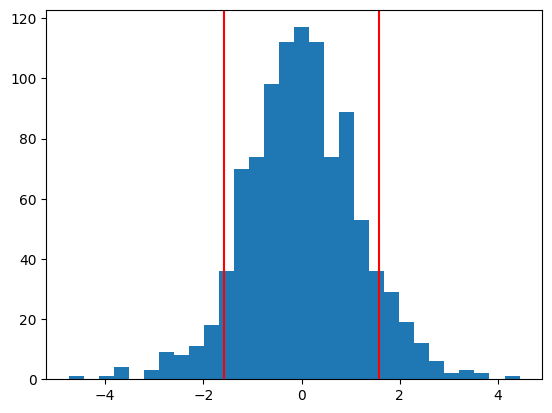

In [9]:
t_values = t_distribution.rvs(size=1000)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.axvline(statistic, color='red')
ax.axvline(-statistic, color='red')

ax.hist(t_values, bins=30);

**Поговорим про распределение выборочного среднего**

In [21]:
population = np.random.uniform(-10, 4, 100000)
expectation = population.mean()

In [18]:
def get_sample_means(population, sample_size, n_samples=10000):
    sample_means = []
    
    for i in range(n_samples):
        sample = np.random.choice(population, sample_size)
        sample_means.append(sample.mean())

    return sample_means

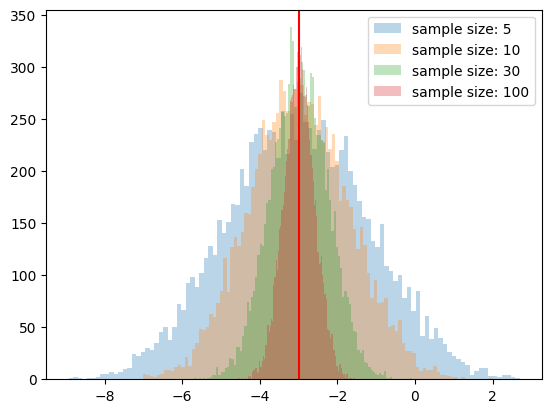

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axvline(expectation, color='red')

sample_sizes = [5, 10, 30, 100]

for sample_size in sample_sizes:
    sample_means = get_sample_means(population, sample_size)
    
    ax.hist(sample_means, bins=100, label=f'sample size: {sample_size}', alpha=.3)

ax.legend();

E(sample_mean) ~ N(E(X), Var(X) / sample_size ** (1 / 2))

**Задача**

In [28]:
mean = 1.8
std = 0.2

value = 2.3

In [30]:
normal_distrib = stats.norm(mean, std)

In [32]:
1 - normal_distrib.cdf(value)

0.006209665325776159

In [6]:
import numpy as np
import pandas as pd
from scipy import stats

data = pd.read_excel('ess_data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35987 entries, 0 to 35986
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cntry     35987 non-null  object
 1   netusoft  35987 non-null  object
 2   ppltrst   35987 non-null  int64 
 3   clsprty   35987 non-null  object
 4   rlgatnd   35987 non-null  object
 5   gndr      35987 non-null  object
 6   agea      35987 non-null  int64 
 7   tporgwk   35987 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.2+ MB


In [2]:
sweden_age = data.loc[data['cntry'] == 'Norway', 'agea'].values
sweden_age.size

1384

In [3]:
sample_mean = sweden_age.mean()
sample_std = sweden_age.std(ddof=1)
theoretic_mean = 45
sample_mean

47.229046242774565

In [6]:
# H0: sample_mean = theoretic_mean
# Ha: sample_mean != theoretic_mean

statistic = (sample_mean - theoretic_mean) / (sample_std / sweden_age.size ** (1 / 2))
statistic  # n > 100, t -> Z

4.559245576182668

In [4]:
norm_distribution = stats.norm(0, 1)

In [7]:
norm_distribution.cdf(-statistic) * 2  # H0 отвергаем

5.133771061182503e-06

In [8]:
stats.ttest_1samp(
    sweden_age,
    theoretic_mean,
    alternative='two-sided'
)

TtestResult(statistic=4.559245576182668, pvalue=5.587337945236918e-06, df=1383)

**Задача.** При каком интервале теоретических значений среднего H0 не будет отвергнута против двусторонней альтернативы?

In [ ]:
p-value >= 0.05 <=> P(Z <= -statistic0) + P(Z >= statistic0)

P(Z <= -statistic0) >= 0.025
statistic = (sample_mean - theoretic_mean) / (sample_std / sweden_age.size ** (1 / 2))

In [29]:
norm_distribution.ppf(0.025)

-1.9599639845400545

In [ ]:
P(Z <= -statistic0) >= 0.025 -> (-1.9599639845400545, 1.9599639845400545)

In [ ]:
statistic = (sample_mean - theoretic_mean) / (sample_std / sweden_age.size ** (1 / 2))
(sample_mean - theoretic_mean) = (sample_std / sweden_age.size ** (1 / 2)) * statistic
theoretic_mean = - (sample_std / sweden_age.size ** (1 / 2)) * statistic + sample_mean
theoretic_mean = sample_mean - statistic * (sample_std / sweden_age.size ** (1 / 2))

In [32]:
sample_mean -1.9599639845400545 * (sample_std / sweden_age.size ** (1 / 2)), sample_mean, sample_mean + 1.9599639845400545 * (sample_std / sweden_age.size ** (1 / 2))

(46.27080648957171, 47.229046242774565, 48.18728599597742)

$H_0: \mu_x=a$ <br>
$H_A: \mu \neq a$ <br>
$\mu$ - mean <br>
$a$ - some value

Допущения:
- та переменная, из который мы рассматриваем выборку, является числовой (не order);
- X (здесь и далее X - генеральная совокупность) имеет нормальное распределение.

1. Те величины, на которые влияет большое количество разнонаправленных слабых факторов, скорее всего, распределены нормально;
2. Есть специальный тест, который позволяет оценить гипотезу, что выборка пришла из нормального распределения.

### Парные наблюдения
#### Парный t-test

$H_0: \mu_{after}=\mu_{before}$ <br>
$H_A: \mu_{after} \neq \mu_{before}$ <br>
$\hat{\mu}$ - sample mean <br>

Допущения:

- X (здесь и далее X - генеральная совокупность) имеет нормальное распределение
- обе выборки представляют собой измерения одних и тех же объектов

In [ ]:
#  BEFORE AFTER    DIFF
#1   3     3.4     0.4
#2   2.4   2.6     0.2
#3   3.2   3.3     0.1
#4   3.9   3.4     -0.5
#5   1.8   1.97    0.17

$H_0: \mu_{difference}=0$ <br>
$H_a: \mu_{difference} \neq 0$

In [11]:
before = [3, 2.4, 3.2, 3.9, 1.8]
after = [3.4, 2.6, 3.3, 3.4, 1.97]

diff = np.array([0.4, 0.2, 0.1, -0.5, 0.17])

sample_mean = diff.mean()
sample_std = diff.std(ddof=1)
sample_size = diff.size

statistic = (sample_mean - 0) / (sample_std / sample_size ** (1 / 2))
statistic  # насколько вероятно получить такое же или более экстремальное значение статистики при условии верной H0?

0.48713737841224136

In [10]:
df = sample_size - 1

t_distrib = stats.t(df)

t_distrib.cdf(-statistic) * 2  # p-value

0.6516514312574402

In [13]:
stats.ttest_rel(after, before)

TtestResult(statistic=0.4871373784122409, pvalue=0.6516514312574404, df=4)

#### Критерий знаков

![](https://slideplayer.com/slide/6959440/24/images/4/Bernoulli+Distribution.jpg)

![](https://slideplayer.com/slide/5269821/17/images/24/Binomial+Distribution+Formula.jpg)

![](https://slideplayer.com/slide/17819162/106/images/60/4-7+Normal+Approximation+to+the+Binomial+and+Poisson+Distributions.jpg)

$H_0: median_x = median_y$ <br>
$H_A: median_x \neq median_y$ <br>

Допущения:

- обе выборки представляют собой измерения одних и тех же объектов

In [ ]:
# Bernoulli:
# - E(X) = p
# - Var(X) = p * (1 - p)

# Binomial:
# - E(X) = n * p
# - Var(X) = n * p * (1 - p)

In [ ]:
#  BEFORE AFTER   IS_SUCCESS(AFTER > BEFORE)
#1   3     3.4             1
#2   2.4   2.6             1
#3   3.2   3.3             1
#4   3.9   3.4             0
#5   1.8   1.97            1

In [5]:
before = [3, 2.4, 3.2, 3.9, 1.8]
after = [3.4, 2.6, 3.3, 3.4, 1.97]

In [ ]:
# statistic = n_success = 4

In [ ]:
# при верной H0 statistic имеет биномиальное распределение с параметрами:
# n = 5
# p = 0.5

# а какая вероятность получить такое же или более экстремальное значение статистики при верной H0?

# экстремально в большую сторону: 4, 5
# экстремально в меньшую сторону: вначале посчитаем среднее, чтобы найти симметричную статистику (0, 1)

In [24]:
# среднее - n * p:
5 * 0.5

2.5

In [ ]:
[0, 1], 2, (2.5), 3, [4, 5]

In [25]:
binom_distrib = stats.binom(5, 0.5)

In [27]:
binom_distrib.pmf([0, 1, 4, 5]).sum()

0.37499999999999994

**Задача.** Возможно ли на данном размере выборки вообще отклонить H0 при пороговом значении p-value равном 0.05 (при односторонней альтернативе)?

In [28]:
# самое экстремальное значение статистики при правосторонней альтернативе будет 5

binom_distrib.pmf(5)  # да, на указанном пороге p-value возможно

0.03125

In [ ]:
# а возможно ли вообще отвергнуть H0 для выборок размером 4

In [29]:
stats.binom(4, 0.5).pmf(4)  # при n <= 4 H0 невозможно отвергнуть

0.0625

**Задача.** Николаю надо ответить минимум на 3 вопроса из 6 возможных. В каждом вопрое 4 варианта ответа, правильный один. Какова вероятность, что Николай сдаст экзамен не готовясь?

In [21]:
n = 6
p = 0.25

binom_distrib = stats.binom(n, p)

In [23]:
binom_distrib.pmf([3, 4, 5, 6]).sum()

0.1694335937499999

Биномиальное распределение может быть аппроксимировано к стандартному нормальному:

In [32]:
import matplotlib.pyplot as plt

def plot_binom_values(n, p):
    binom_distrib = stats.binom(n, p)
    outcomes = np.arange(n + 1)
    probs = binom_distrib.pmf(outcomes)

    fig, ax = plt.subplots()

    ax.bar(outcomes, probs)
    ax.set_xlabel('outcome')
    ax.set_ylabel('probability')
    
    ax.set_title(f'binom(n={n}, p={p})')

    if n <= 20:
        ax.set_xticks(outcomes, outcomes)

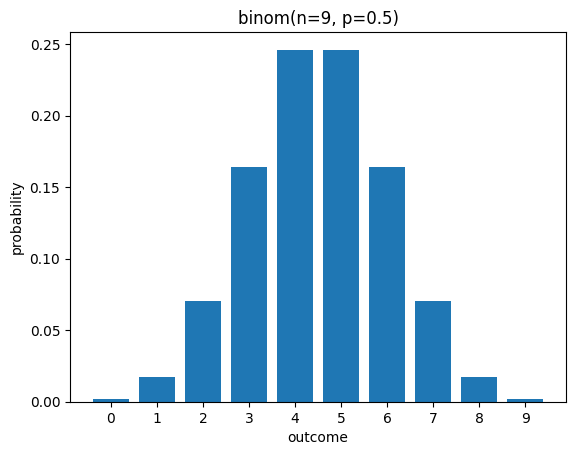

In [33]:
plot_binom_values(9, 0.5)

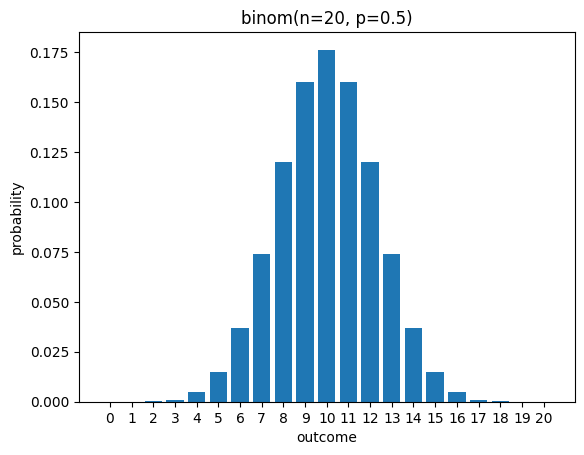

In [34]:
plot_binom_values(20, 0.5)

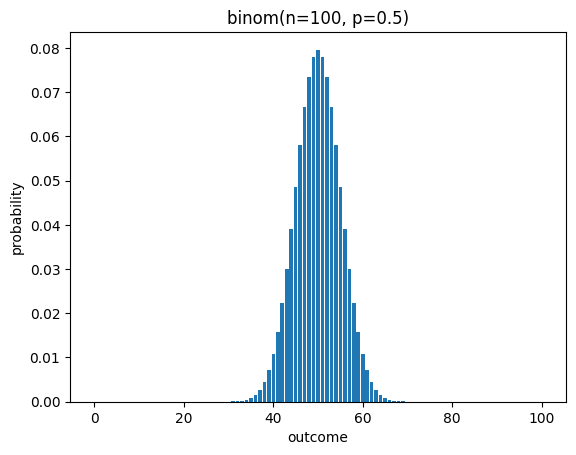

In [35]:
plot_binom_values(100, 0.5)

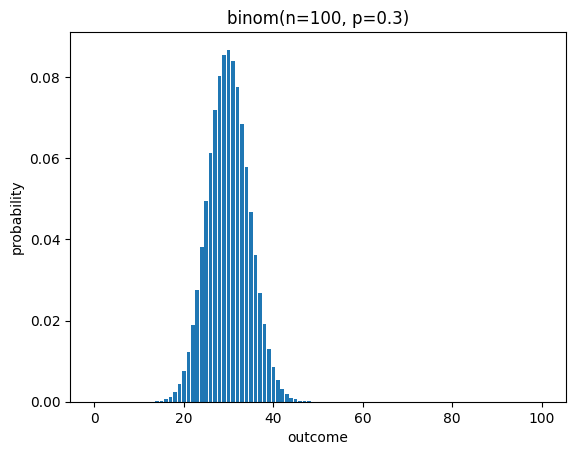

In [36]:
plot_binom_values(100, 0.3)

**Задача.** Использовать критерий знаков.

In [7]:
# парный t-test
stats.ttest_rel(
    before,
    after,
    alternative='two-sided'
)

TtestResult(statistic=-0.4871373784122409, pvalue=0.6516514312574404, df=4)

In [ ]:
# парный критерий знаков
# p-value: 0.38

#### Парный критерий Уилкоксона

$H_0: median_x = median_y$ <br>
$H_A: median_x \neq median_y$ <br>

Допущения:

- обе выборки представляют собой измерения одних и тех же объектов
- значения разности более должы быть вариативны (т. е. не -1/0/1: для таких случаев лучше критерий знаков)
- n >= 5. При этом случаи, когда разность равна 0, исключаются из подсчета статистики

Подробнее см. [тут](https://medstatistic.ru/methods/methods3.html).

In [ ]:
#  BEFORE AFTER    DIFF   RANK
#1   3     3.4     0.4     4
#2   2.4   2.6     0.2     2
#3   3.2   3.3     0.1     1
#4   3.9   3.4     -0.5    0
#5   1.8   1.97    0.17    3

In [8]:
stats.wilcoxon(
    before,
    after,
    alternative='two-sided'
)

WilcoxonResult(statistic=5.0, pvalue=0.625)

### Сравнение двух выборок
#### Двухвыборочный t-test (не путать с парным)
![](https://cdn1.qualitygurus.com/wp-content/uploads/2022/12/Two-sample-t-test-formulas.png?lossy=1&ssl=1)

$H_0: \mu_x = \mu_y$ <br>
$H_A: \mu_x \neq \mu_y$ <br>

Допущения:

- X и Y имеют нормальное распределение

**Как вы думаете, что будет, если вместо этого теста использовать парный критерий?**

In [12]:
age_male = data.loc[(data['cntry'] == 'Norway') & (data['gndr'] == 'Male'), 'agea'].values
age_female = data.loc[(data['cntry'] == 'Norway') & (data['gndr'] == 'Female'), 'agea'].values

In [10]:
age_male.mean(), age_female.mean()

(47.77574047954866, 46.65481481481481)

In [ ]:
# H0: средний возраст мужчин и женщин равен

In [19]:
age_male.mean() - age_female.mean()

1.1209256647338464

In [17]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=False
)
# pvalue - вероятность получить имеющееся значение статистики (statistic) при условии верной H0 (т. е. получить случайно)

TtestResult(statistic=1.1473481001455839, pvalue=0.2514363738928764, df=1381.943195299341)

#### F-тест о равенстве дисперсий
Имеется и непараметрический вариант: Levene test.
![](https://image.slideserve.com/963492/f-test-example-solution1-l.jpg)

Допущения:

- X и Y имеют нормальное распределение

In [14]:
def f_test(sample1, sample2):
    var1 = sample1.var(ddof=1)
    var2 = sample2.var(ddof=1)

    # compute statistic
    if var1 >= var2:
        statistic = var1 / var2
        df1, df2 = sample1.size, sample2.size
    else:
        statistic = var2 / var1
        df1, df2 = sample2.size, sample1.size

    # get distribution
    f_distrib = stats.f(df1, df2)

    # compute p-value
    return statistic, 1 - f_distrib.cdf(statistic)

In [15]:
# посмотрим, имеем ли мы право поставить ниже в equal_var True
f_test(
    age_male,
    age_female
)

(1.0892965881947765, 0.13070458804739526)

In [16]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=True
)

TtestResult(statistic=1.1461431790107866, pvalue=0.2519343265853811, df=1382.0)

In [17]:
stats.levene(
    age_male,
    age_female
)

LeveneResult(statistic=2.173100611732319, pvalue=0.1406705603208207)

#### Критерии Уилкоксона и Манна-Уитни
![](images/wilcox.png)
![](images/mann_whitney.png)

In [14]:
stats.ttest_ind(
    age_male,
    age_female,
    alternative='two-sided',
    equal_var=False
)

TtestResult(statistic=1.1473481001455839, pvalue=0.2514363738928764, df=1381.943195299341)

In [15]:
stats.mannwhitneyu(
    age_male,
    age_female,
    alternative='two-sided'
)

MannwhitneyuResult(statistic=247264.0, pvalue=0.28312057544024005)

#### Критерий Колмогорова-Смирнова

In [16]:
# возраст мужчин и женщин имеет равную дисперсию и средние. Может, эти две выборки пришли из одной и той же генеральной совокупности?

# H0: из одного распределения
# Ha: не из одного распределения
stats.kstest(
    age_male,
    age_female
)

KstestResult(statistic=0.051210364101760435, pvalue=0.3100250775915103, statistic_location=65, statistic_sign=-1)

### Сравнение многих выборок
#### ANOVA (он же однофакторный дисперсионный анализ)
![](https://i.pinimg.com/originals/eb/94/f9/eb94f9bae12be2d6617549bd22e7d216.jpg)
![](./images/anova.png)

$H_0: \mu_{x_1} = \mu_{x_2} = ... = \mu_{x_n}, X \sim N(\mu, \delta)$<br>
$H_A: \mu_{x_1} \neq \mu_{x_2} \neq ... \neq \mu_{x_n}, X \sim N(_, \delta)$

**Допущения.**
1. Количественный непрерывный тип данных, дискретные данные менее желательны.
2. Независимые между собой выборки.
3. Нормальное распределение признака в генеральных совокупностях, из которых извлечены выборки.
4. Равенство (гомогенность) дисперсий изучаемого признака в генеральных совокупностях, из которых извлечены выборки.
5. Независимые наблюдения в каждой из выборок.

**Вопрос.** Отличается ли вообще возраст во всех представленных в данных странах?

In [21]:
data.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Belgium,Every day,6,No,Once a week,Female,16,Not applicable
1,Belgium,Every day,3,No,Never,Female,24,A private firm
2,Belgium,Every day,6,Yes,Never,Male,58,A private firm
3,Belgium,Every day,7,No,Never,Male,35,Other
4,Belgium,Every day,3,No,Never,Male,61,Other public sector (such as education and hea...


In [22]:
ages = [series.values for group, series in data.groupby('cntry')['agea']]

In [23]:
stats.f_oneway(*ages)

F_onewayResult(statistic=21.134386131194894, pvalue=2.623811625933467e-80)

#### Kruskal Wallis Test (критерий Краскелла-Уоллиса)
Минус допущение о нормальности генеральных совокупностей. Однако, этот критерий служит только для проверки сдвига!

In [24]:
stats.kruskal(*ages)

KruskalResult(statistic=422.81394650307897, pvalue=1.7429411866934363e-76)

#### Бонус: поправка на множественное сравнение
**Задача 1.** Мы хотим исследовать среднюю продолжительность жизни в 10 российских регионах. Сколько попарных сравнений нам надо сделать?

In [19]:
np.arange(2, 10).sum()

44

**Задача 2.** Пусть приемлемый порог p-value составляет 0.05. Какова вероятность ни разу не совершить ошибку 1 рода за все 44 попытки?

In [21]:
# совершение ошибки I рода - успех
# binom:
n = 44
p = 0.05

# нас интересует вероятность получить 0 успехов за 44 попытки при вероятности успеха в каждой 0.05
binom_distrib = stats.binom(n, p)
binom_distrib.pmf(0)

0.10467395472325519

In [23]:
44 * 0.05  # сколько ошибок мы в среднем сделаем

2.2

**Задание 3.** Каким должно быть пороговое p-value для отдельного теста, если мы хотим вероятность совершить ошибку I рода не более 0.05 (вероятность ее НЕ совершить ни разу будет 0.95?

In [27]:
p_current = p
prob = binom_distrib.pmf(0)

while prob < 0.95:
    p_current += -1e-4
    binom_distrib_current = stats.binom(n, p_current)
    prob = binom_distrib_current.pmf(0)

In [29]:
p_current  # поправка в порог p-value (поправка на множественное сравнение)

0.0010999999999996015

In [30]:
# поправка Bonferroni
p / n

0.0011363636363636365

**Задача.** Необходимо проверить, во всех ли странах есть значимые различия между возрастом мужчин и женщин.

In [17]:
result = []

for country, df in data.groupby('cntry'):
    male = df.loc[df['gndr'] == 'Male', 'agea']
    female = df.loc[df['gndr'] == 'Female', 'agea']

    result.append([country, stats.mannwhitneyu(male, female).pvalue])

In [19]:
cutoff = 0.05

result_df = pd.DataFrame(result, columns=['country', 'p_value'])
result_df['signif'] = result_df['p_value'] < cutoff
result_df['signif_adjusted'] = result_df['p_value'] < (cutoff / result_df['country'].size)
result_df.head()

,country,p_value,signif,signif_adjusted
0,Belgium,3.714186e-01,False,False
1,Bulgaria,4.556073e-07,True,True
2,Croatia,5.883318e-01,False,False
3,Czechia,4.284426e-01,False,False
4,Estonia,4.310573e-04,True,True


In [20]:
result_df[['signif', 'signif_adjusted']].sum()

signif             9
signif_adjusted    5
dtype: int64

### Сравнение выборки с заданным распределением
#### Полиномиальный тест

#### Критерий согласия Chi-squared
![](https://cf2.ppt-online.org/files2/slide/p/p1fDJoE9zLG0R5OgWv4PtcSihTYa2unFX6qwdm8QVU/slide-38.jpg)

Критерий согласия хи-квадрат применим, только если ожидаемое значение в каждой ячейке больше 5, а общее количество объектов не менее 20.

**Задача.** Есть 5 магазинов. В каждом из них за день продано определенное количество товара. Надо проверить, есть ли разница между магазинам в продажах?

In [9]:
# H0: значения пришли из одного дискретного распределения
# Ha: !H0

sales = np.array([60, 54, 32, 43, 71])
sales_mean = sales.mean()

statistic = ((sales - sales_mean) ** 2).sum() / sales_mean
statistic

17.5

In [10]:
df = sales.size - 1

1 - stats.chi2(df).cdf(statistic)  # H0 отвергается

0.0015449979198786101

**Задача.** Есть ли значимые отличия в количестве респондентов в разных странах?

In [ ]:
# наш код здесь

#### Критерий Колмогорова
Проверка совпадения распределений генеральной совокупностей двух выборок:

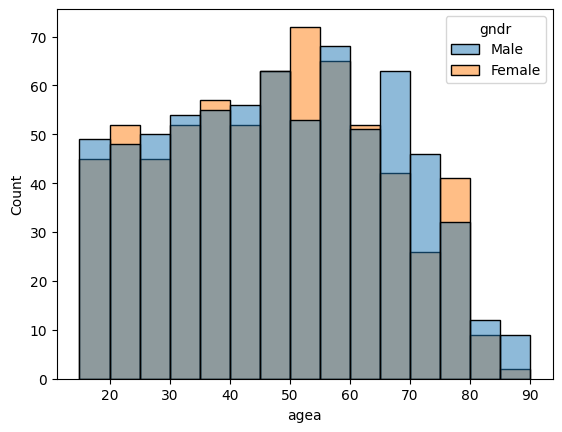

In [11]:
import seaborn as sns

sns.histplot(data=data[data['cntry'] == 'Norway'], x='agea', hue='gndr');

In [13]:
# H0: выборка пришла из данного распределения
# Ha: ~

# распределен ли возраст мужчин в Норвегии нормально с параметрами sample_mean, sample_var
stats.kstest(
    rvs=age_male,
    cdf=stats.norm.cdf, args=(age_male.mean(), age_male.std(ddof=1))
)  # H0 отвергается -> возраст мужчин в Норвегии не распределен нормально

KstestResult(statistic=0.06220106463965877, pvalue=0.00792628715801556, statistic_location=30, statistic_sign=1)

### Таблица сопряженности
Взаимодействие двух категориальных переменных.

#### Точный тест Фишера

ТОЛЬКО таблица 2 * 2 (В R есть расширенная версия - fisher.test).

In [27]:
data_norway = data[data['cntry'] == 'Norway'].reset_index(drop=True)
data_norway.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Norway,Every day,7,No,Less often,Male,55,A private firm
1,Norway,Every day,9,Yes,Less often,Female,58,Other public sector (such as education and hea...
2,Norway,Every day,8,No,Only on special holy days,Female,35,Other public sector (such as education and hea...
3,Norway,Every day,3,No,Never,Male,18,A private firm
4,Norway,Every day,3,Yes,Only on special holy days,Male,22,A private firm


In [29]:
crosstab = pd.crosstab(data_norway['clsprty'], data_norway['gndr'])

In [30]:
stats.fisher_exact(crosstab)

SignificanceResult(statistic=1.0293462286066468, pvalue=0.8201536989824305)

#### Критерий Chi-squared
![](https://www.statstest.com/wp-content/uploads/2020/10/Chi-Square-Test-of-Independence-1.jpg)

Теперь рассматриваем взаимодействие двух категориальных переменных.

In [26]:
data_norway = data[data['cntry'] == 'Norway'].reset_index(drop=True)
data_norway.head()

,cntry,netusoft,ppltrst,clsprty,rlgatnd,gndr,agea,tporgwk
0,Norway,Every day,7,No,Less often,Male,55,A private firm
1,Norway,Every day,9,Yes,Less often,Female,58,Other public sector (such as education and hea...
2,Norway,Every day,8,No,Only on special holy days,Female,35,Other public sector (such as education and hea...
3,Norway,Every day,3,No,Never,Male,18,A private firm
4,Norway,Every day,3,Yes,Only on special holy days,Male,22,A private firm


Есть ли взаимосвязь между гендером и политической заинтересованностью?

`clsprty` - feel closer to one party than others<br>
`gndr`    - пол

In [35]:
crosstab = pd.crosstab(data_norway['clsprty'], data_norway['gndr'])
crosstab

gndr,Female,Male
clsprty,,
No,230,237
Yes,445,472


In [36]:
# какая доля мужчин и женщин отвечает "да" на вопрос о большей близости к одной из политических партий?
pd.crosstab(data_norway['clsprty'], data_norway['gndr'], normalize=1)

gndr,Female,Male
clsprty,,
No,0.340741,0.334274
Yes,0.659259,0.665726


Для проверки значимости этих различий существует т. н. Chi-squared independence test.

H0: взаимосвязи нет<br>
Ha: взаимосвязь есть.

Статистика для теста при верной H0 имеет распределение Chi-squared.

In [38]:
chi2_result = stats.chi2_contingency(crosstab)

In [39]:
chi2_result.expected_freq  # expected requencies under H0

array([[227.76372832, 239.23627168],
       [447.23627168, 469.76372832]])

In [40]:
chi2_result.statistic

0.038994863771994

In [41]:
chi2_result.pvalue  # H0 не отвергается

0.8434588386642923

Посмотрим на взаимосвязь netusoft (как часто использует Интернет) и clsprty:

In [44]:
order = ['Never', 'Only occasionally', 'A few times a week', 'Most days', 'Every day']

crosstab = pd.crosstab(data_norway['clsprty'], data_norway['netusoft'])
crosstab.loc[:, order]

netusoft,Never,Only occasionally,A few times a week,Most days,Every day
clsprty,,,,,
No,3,4,3,15,442
Yes,16,11,13,61,816


In [45]:
pd.crosstab(data_norway['clsprty'], data_norway['netusoft'], normalize=1).loc[:, order]

netusoft,Never,Only occasionally,A few times a week,Most days,Every day
clsprty,,,,,
No,0.157895,0.266667,0.1875,0.197368,0.351351
Yes,0.842105,0.733333,0.8125,0.802632,0.648649


In [46]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=12.443145338124966, pvalue=0.014342904504516472, dof=4, expected_freq=array([[  5.39884393, 424.48410405,  25.64450867,   6.41112717,
          5.06141618],
       [ 10.60115607, 833.51589595,  50.35549133,  12.58887283,
          9.93858382]]))

### Сравнение чисел наблюдений
#### Число успехов при заданном числе испытаний
Проверим предыдущую гипотезу (о том, что и мужчины и женщины одинаково отвечают "да" на вопрос о наличии любимой партии), но другим способом. Пусть имеется $n$ успехов при $N$ испытаниях и $m$ успехов при $M$ испытаниях.

$H_0:$ доля успехов в двух случаях одна и та же<br>
$H_A:$ доли успехов в двух случаях различаются

Тогда при верной $H_0:$

$p=\frac{n + m}{N + M}$<br><br>
$D_1=\frac{p(1-p)}{N}$<br>
$D_2=\frac{p(1-p)}{M}$<br><br>
$Z=\frac{\frac{n}{N} - \frac{m}{M}}{\sqrt{D_1 + D_2}}$<br>
$Z \sim N(0, 1)$

In [ ]:
# наш код здесь

#### Число успехов при неопределенном максимуме
![poisson](https://cf.ppt-online.org/files/slide/m/MI9r1WpmVsd8JtknYfC4KRUSoc5QGADiTuezyO/slide-9.jpg)
**Задача.** Мальчик поймал за сезон 50 рыжих майских жуков и 33 чёрных. Можно ли утверждать, что рыжие встречаются в этом году чаще?

$D_1=\frac{n + m}{2}$<br>
$D_2=\frac{n + m}{2}$<br><br>

$Z=\frac{n - m}{\sqrt{D_1 + D_2}}=\frac{n - m}{\sqrt{n + m}}$

**!NB!** Данный способ может применяться только при достаточно большом среднем (> 20).

In [ ]:
# наш код здесь

### Сравнение коэффициента корреляции с нулем
$H_0:$ корреляция равна 0<br>
$H_A:$ корреляция не равна 0

Связь двух числовых (порядковых) переменных:

In [ ]:
# numeric & numeric
# ppltrst - степень доверия случайным людям от 0 до 10
# agea

In [31]:
# X, Y должны происходить из генеральных совокупностей, распределенных нормально
# мера линейной взаимосвязи

stats.pearsonr(data_norway['ppltrst'], data_norway['agea'])  # корреляция доверия к людям и возраста слабая, но значимая

PearsonRResult(statistic=0.15900242188850106, pvalue=2.7183164677164256e-09)

In [32]:
# нет требования к нормальности
# ~ мера линейной взаимосвязи
stats.spearmanr(data_norway['ppltrst'], data_norway['agea'])

SignificanceResult(statistic=0.17812730502508445, pvalue=2.486273813337128e-11)

In [33]:
# нет требования к нормальности
# мера не только линейной взаимосвязи
# только для ранговых данных
stats.kendalltau(data_norway['ppltrst'], data_norway['agea'])

SignificanceResult(statistic=0.1316238639494908, pvalue=1.5937051688443437e-11)

### Немного о регрессии со статистической точки зрения

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
print(ols( 'ppltrst ~ agea', data=norway_data).fit().summary())

In [1]:
import torch

In [4]:
torch.tensor([1, 2, 3]).unsqueeze(0)

tensor([[1, 2, 3]])